

# Project:  Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

> The data set that I have selected is Appointment No Shows . The reason why I have selected this dataset is becuase I worked on medical dataset during my internship so i'm familiar with medical dataset.
> ### Questions
> These are the following questions I want to analyze using this dataset:
>1. Is there any Gender difference in having a patient to be with status Show? 
>2. Is there any Age difference in having a patient to be with status Show?
>3. Is there any Age difference along with Gender difference with the status of Show?
>4. On which weekday/day/month maximum appointments are getting finalized with Show status?
>5. Are the digital /social media reminders are helping the patients to take doctor's appointment?
>6. Is Scholarship from the government helping patients for good turnaround for physician visits?
>7. Which neighbourhood regions are have higher appointments with physicians?


In [68]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

#### Loading the data

In [5]:
df = pd.read_csv('noshowappointments.csv')
# view data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# describe data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Minimum age is showing -ve (May be an outlier) and max value of age are ranging above 100

In [11]:
#Variable Identification
# First we will identify the predictor and target variable
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

No-show is a target variable and all other variables are predictors

In [10]:
df.dtypes # Datatypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#### Data Type

>Character
 Gender , ScheduledDay, AppointmentDay , Neighbourhood, No-show

#### Numeric

>PatientId, AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received

##### Variable Category

>Categorical
   
    'Gender', 'Neighbourhood', 'Scholarship', 'Hipertension',
    'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'

In [12]:
#Check missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no missing values

In [13]:
#structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check for some sample counts

In [14]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [15]:
df['Gender'].value_counts() # check that no. of male and female present in the dataset

F    71840
M    38687
Name: Gender, dtype: int64

In [16]:
#Check for scheduled day and appointment day  
df[['ScheduledDay','AppointmentDay']].head(5)

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


In [17]:

# # Convert that dateformat which is in string to datetime64[ns]
# The day of the week with Monday=0, Sunday=6

df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['Day_Scheduled'] = df['ScheduledDay'].dt.day
df['weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['Month_Scheduled'] = df['ScheduledDay'].dt.month


df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['Day_appointed'] = df['AppointmentDay'].dt.day
df['weekday_appointed'] = df['AppointmentDay'].dt.dayofweek
df['Month_appointed'] = df['AppointmentDay'].dt.month

In [19]:
# view data
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4,29,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4,29,4,4


In [20]:
# Define columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [22]:
#unique month
df['Month_appointed'].nunique()

3

In [24]:
#Rename the columns which have incorrect spelling mistakes - this will helps us create columns in easy to understand way
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap':'Handicap', 'No-show' : 'NoShow'}, inplace = True)
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4,29,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4,29,4,4


In [26]:
# Check how many records with age < 0 and age > 100
df.query('Age < 0  | Age > 100').count()

PatientId            8
AppointmentID        8
Gender               8
ScheduledDay         8
AppointmentDay       8
Age                  8
Neighbourhood        8
Scholarship          8
Hypertension         8
Diabetes             8
Alcoholism           8
Handicap             8
SMS_received         8
NoShow               8
Day_Scheduled        8
weekday_Scheduled    8
Month_Scheduled      8
Day_appointed        8
weekday_appointed    8
Month_appointed      8
dtype: int64

In [27]:
# Here droping data
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

In [28]:
#view information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
PatientId            110519 non-null float64
AppointmentID        110519 non-null int64
Gender               110519 non-null object
ScheduledDay         110519 non-null datetime64[ns]
AppointmentDay       110519 non-null datetime64[ns]
Age                  110519 non-null int64
Neighbourhood        110519 non-null object
Scholarship          110519 non-null int64
Hypertension         110519 non-null int64
Diabetes             110519 non-null int64
Alcoholism           110519 non-null int64
Handicap             110519 non-null int64
SMS_received         110519 non-null int64
NoShow               110519 non-null object
Day_Scheduled        110519 non-null int64
weekday_Scheduled    110519 non-null int64
Month_Scheduled      110519 non-null int64
Day_appointed        110519 non-null int64
weekday_appointed    110519 non-null int64
Month_appointed      110519 non-null int64
dtypes

In [29]:
#Uniuqe patient counts in the dataset
df.PatientId.nunique()

62294

### Missing values treatment & Outlier treatment

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
PatientId            110519 non-null float64
AppointmentID        110519 non-null int64
Gender               110519 non-null object
ScheduledDay         110519 non-null datetime64[ns]
AppointmentDay       110519 non-null datetime64[ns]
Age                  110519 non-null int64
Neighbourhood        110519 non-null object
Scholarship          110519 non-null int64
Hypertension         110519 non-null int64
Diabetes             110519 non-null int64
Alcoholism           110519 non-null int64
Handicap             110519 non-null int64
SMS_received         110519 non-null int64
NoShow               110519 non-null object
Day_Scheduled        110519 non-null int64
weekday_Scheduled    110519 non-null int64
Month_Scheduled      110519 non-null int64
Day_appointed        110519 non-null int64
weekday_appointed    110519 non-null int64
Month_appointed      110519 non-null int64
dtypes

In [38]:
df.isnull().sum()

PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
NoShow               0
Day_Scheduled        0
weekday_Scheduled    0
Month_Scheduled      0
Day_appointed        0
weekday_appointed    0
Month_appointed      0
dtype: int64

>There are no missing values and it seems there are no outliers from the univariate analysis done earlier (There were some patients with Age < 0 and Age > 100 , I have removed them from the data )

### Feature Engineering

>Feature engineering is the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful

>Feature engineering itself can be divided in 2 steps:

>a) Variable transformation.
>b) Variable creation.

In [39]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [40]:
# Here we drop unnecessary column
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)

In [42]:
#define column
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [43]:
df['weekday_appointed'].unique() #unique values 

array([4, 1, 0, 2, 3, 5], dtype=int64)

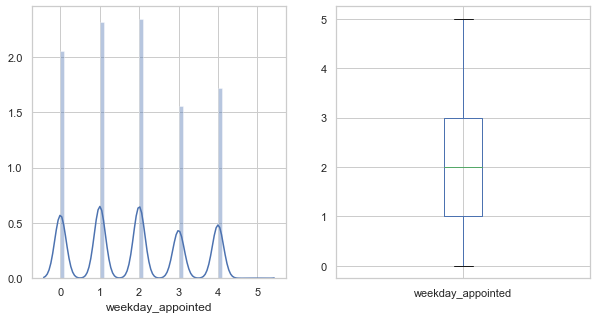

In [65]:
#The day of the week with Monday=0, Sunday=6
plt.figure(1)
plt.subplot(121)
sns.distplot(df['weekday_appointed'])


plt.subplot(122)
df['weekday_appointed'].plot.box(figsize=(10,5))

plt.show()

>Tuesday and Wednesday have maximum number of appointments

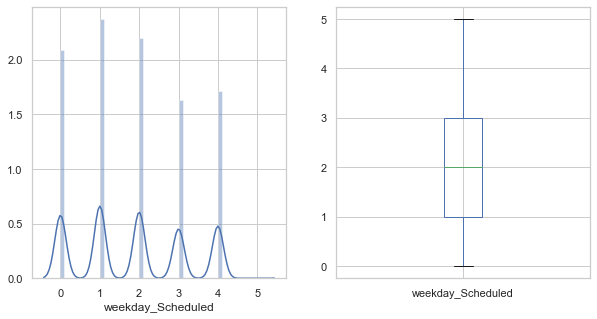

In [63]:
# The day of the week with Monday=0, Sunday=6
plt.figure(1)
plt.subplot(121)
sns.distplot(df['weekday_Scheduled'])


plt.subplot(122)
df['weekday_Scheduled'].plot.box(figsize=(10,5))

plt.show()

>Now the data set is almost cleaned with all the pre-processing steps. Now we can do an Exploratory Data Analysis

<a id='eda'></a>
## Exploratory Data Analysis

>Now I will be answering all the questions mentioned above with my analysis

### Research Question 1 (Is there any Gender difference in having a patient to be with status Show ?)

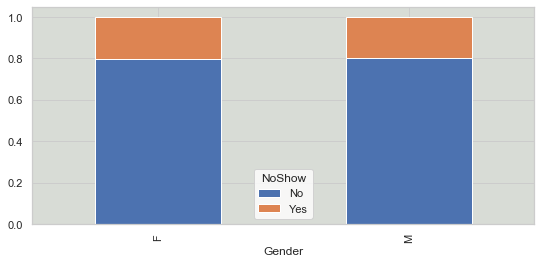

In [46]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
fig, ax = plt.subplots()
Gender=pd.crosstab(df['Gender'],df['NoShow'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(9,4),  ax = ax);
ax.set_facecolor('#d8dcd6')

>There is not much of difference with gender in having the status

### Research Question 2  ( Is there any Age difference in having a patient to be with status Show ?)

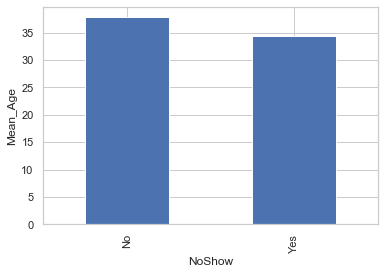

In [47]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
fig, ax = plt.subplots()
df.groupby('NoShow')['Age'].mean().plot.bar()
plt.ylabel('Mean_Age');

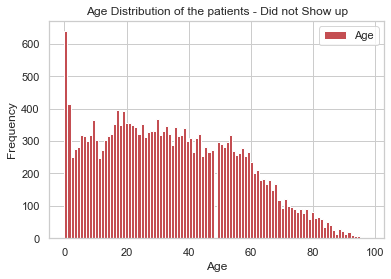

In [48]:
# Age Distribution
# Get the distribution for only NoShow = 1 / Yes
df_NoShow = df[df['NoShow']  == "Yes"]
df_NoShow.plot(kind = "hist",y = "Age",bins = 100, color = 'r') 
plt.title('Age Distribution of the patients - Did not Show up')
plt.xlabel('Age');

> majority patients with age group from 20 to 40 did not show up for the appointment when compared to age groups 0-20, 40-60 and 60 plus

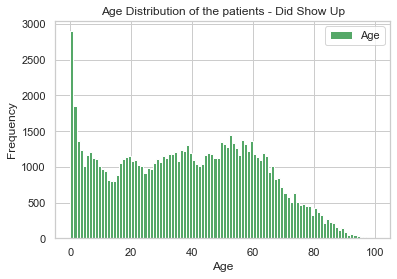

In [49]:
df_Show = df[df['NoShow'] == "No"]
df_Show.plot(kind = "hist",y = "Age",bins = 100, color = 'g') 
plt.title('Age Distribution of the patients - Did Show Up')
plt.xlabel('Age')
plt.show()

> it seems that age group from 40 to 60 have really showed interest in appointment when compared to age groups of 0-20, 20-40 and 60 plus.

### Research Question 3(Is there any Age difference along with Gender difference with the status of Show?)

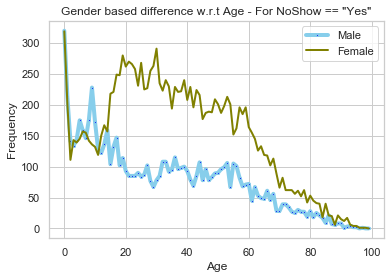

In [50]:
# Analysing the distribution among genders with their age whose status for NoShow is "Yes"
# i.e, they are NOT coming for the appointment.
range_df = pd.DataFrame()
range_df['Age'] = range(100) # Setting up for the age limit of 100 only
Male = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df.NoShow == 'Yes')]))
Female = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df.NoShow == 'Yes')]))

# multiple line plot
plt.plot( range_df, Male, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot( range_df, Female, marker='', color='olive', linewidth=2)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference w.r.t Age - For NoShow == "Yes"');

>Female patients with Age group from 40 to 60 are active in getting appointment with doctors when compared to similar age group of Males

### Research Question 4(Is there any Age difference along with Gender difference with the status of Show?)

In [51]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

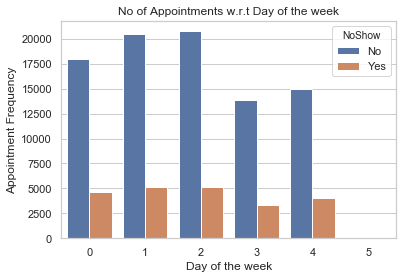

In [52]:
app_weekday = sns.countplot(x = 'weekday_appointed', hue = 'NoShow', data = df)
app_weekday.set_title('No of Appointments w.r.t Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Appointment Frequency')
plt.show()
#The day of the week with Monday=0, Sunday=6

>Majority of the visits or appointments happend on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends

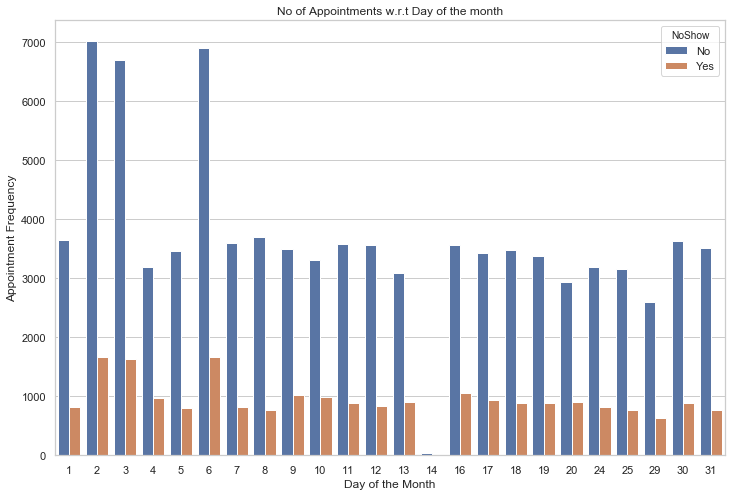

In [53]:
plt.figure(figsize = (12,8))
app_day = sns.countplot(x = 'Day_appointed', hue = 'NoShow', data = df)
app_day.set_title('No of Appointments w.r.t Day of the month')
plt.xlabel('Day of the Month')
plt.ylabel('Appointment Frequency')
plt.show()

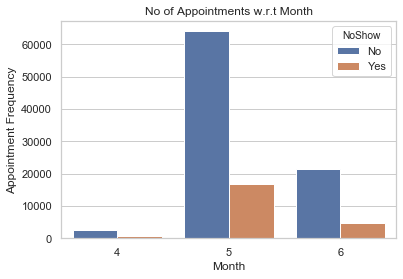

In [54]:
# plt.figure(figsize = (12,8))
app_month = sns.countplot(x = 'Month_appointed', hue = 'NoShow', data = df)
app_month.set_title('No of Appointments w.r.t Month')
plt.xlabel('Month')
plt.ylabel('Appointment Frequency')
plt.show()

#### Research Question 5(Are the digital /social media reminders are helping the patients to take doctor's appointment?)

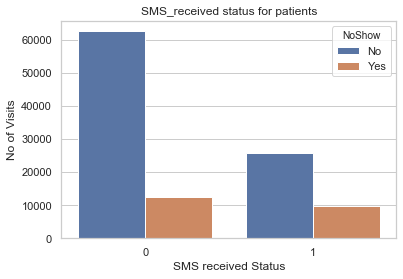

In [55]:
#sms recieved
SMS_recieved = sns.countplot(x = 'SMS_received', hue = 'NoShow', data = df)
SMS_recieved.set_title('SMS_received status for patients')
plt.xlabel('SMS received Status')
plt.ylabel('No of Visits')
plt.show()

>It can be inferred that patients (~25K visits) who have recieved SMS have turned up for physician visit

#### Research Question 6( Is Scholarship from the government helping patients for good turnaround for physician visits?)

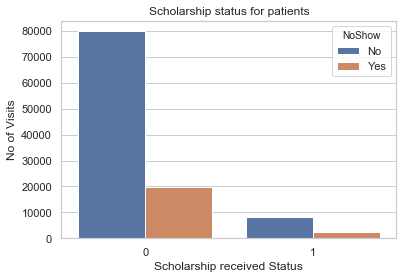

In [56]:
Scholarship = sns.countplot(x = 'Scholarship', hue = 'NoShow', data = df)
Scholarship.set_title('Scholarship status for patients')
plt.xlabel('Scholarship received Status')
plt.ylabel('No of Visits')
plt.show()

>We would expect that patients who have got scholarship should have been all attended the physician but it seems that ~25% of patients did not attend

#### Research Question 7( Which neighbourhood regions are  have higher appointments with physicians?)¶

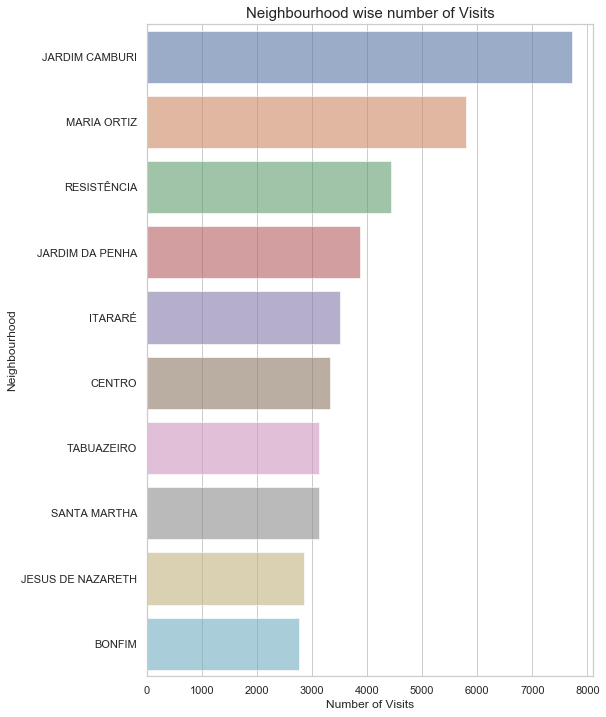

In [72]:
# Top 10 Neighbourhood values based on the Visits
cnt_srs = df['Neighbourhood'].value_counts().head(10)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.6)
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.title("Neighbourhood wise number of Visits", fontsize=15)
plt.show()

### Limitations

>a) If we know the actual patient population from a particular neighborhood, then we can get a reason on why majority of the patients are coming from Jardim Camburi.

>b) The data contained only April, May and June data - If there are complete full year data on monthly basis, we can actually identify the traffic months for physicians appointments

>c) If we had the data on how many SMS are sent to patient, we can actually find out that how many SMS reminders are required for a patient to get active for appointment.

>d) If we would have got the disease severity of each patient, we can try and answer on why certain age group patients are having more visits compared to other age groups.

<a id='conclusions'></a>
## Conclusions

>1) those patients who have showed up for appointment, majority patients with age group from 20 to 40 did not show up for the appointment when compared to age groups 0-20, 40-60 and 60 plus. of these 20 to 40 age group, Female patients are NOT 
active in getting appointment with doctors when compared to similar age group of Males.

>2) Majority of the visits or appointments happend on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends. Hence weekdays are the best for good conversion for appointment.

>3) Hypertension and Diabetes patients are attending the doctor when compared to other medications. Age ranges from 40 to 80 - with females conversion is better than Males.

>4) Alcoholism patients from Male group have showed up for physician visit when compared to female and they are in range from 45 to 65.

>5) Majority of the visits happend from Jardim Camburi, but we are not sure on why this happend. There might be many reasons like majority of the patient population might be from that place or majority of the physicians are from that location. This is one of the limitations

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0